## <span style="color:#EEE8AA">EDA des candidatures au poste de chercheur d’or chez OrFée </span>

Authors :   
- Roland DUTAUZIET  
- Maeva N'GUESSAN  

## <span style="color:#EEE8AA">Configuration du chemin </span>

In [1]:
import os, sys
os.chdir(os.path.dirname(os.path.abspath(__file__))) if "__file__" in locals() else None
sys.path.append(os.path.abspath("C:/Users/dutau/Desktop/ML Appliqué/TP_1/MaevaNGUESSAN_RolandDUTAUZIET_TP1"))

In [2]:
from src.analyse_exploratoire import taux_missing_values_nb, taux_missing_values, is_outlier

## <span style="color:#EEE8AA"> Librairies </span>

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import random 
from tqdm.auto import tqdm

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


c:\Users\dutau\Desktop\ML Appliqué\TP_3\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA

In [5]:
import torch
import torch.nn as nn

<hr>
<h2>Description</h2>
<p>Le jeu de données contenu dans train.csv décrit des candidatures au poste de
chercheur d’or chez OrFée.<br>

<p>Le jeu de données comporte 12 colonnes :<br>
• <b>id</b>  : identifiant unique de chaque ligne<br>
• <b>date</b>  : date de la candidature<br>
•  <b>age</b>: âge du candidat<br>
•  <b>diplome</b>: plus haut diplôme obtenu (bac, licence, master, doctorat)<br>
• <b>specialite</b> : spécialité du diplôme (géologie, forage, détective, archéologie, . . . )<br>
• <b>salaire</b>: salaire demandé<br>
• <b>dispo</b>: oui : disponibilité immédiate, non : pas disponible immédiatement<br>
• <b>sexe</b>: féminin (F) ou masculin (M)<br>
• <b>exp</b> : nombre d’années d’expérience<br>
• <b>cheveux</b> : couleur des cheveux (châtain, brun, blond, roux)<br>
• <b>note</b> : note (sur 100) obtenue à l’exercice de recherche d’or<br>
• <b>embauche</b> : le candidat a-t-il été embauché ? (0 : non, 1 : oui) <br>

## <span style="color:#EEE8AA"> Load Dataset </span>

In [273]:
df = pd.read_csv(r'mo-sef-applied-ml/data/train.csv') #Notre ensemble de données initial
df.shape

(15000, 12)

In [274]:
df.sample(5)  # Affiche 5 lignes aléatoires du dataset

,id,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
10200,10200,2013-10-29,brun,32.0,9.0,25145.0,F,master,archeologie,93.06,non,0
6663,6663,2011-09-12,chatain,22.0,11.0,36306.0,M,doctorat,forage,78.24,oui,0
5700,5700,2013-01-22,brun,41.0,7.0,31878.0,F,bac,geologie,47.98,non,0
5406,5406,2014-07-12,blond,39.0,13.0,30778.0,F,licence,detective,90.29,non,0
2427,2427,2012-10-16,blond,41.0,12.0,35003.0,M,licence,forage,65.85,non,0


In [275]:
test = pd.read_csv(r'mo-sef-applied-ml/data/test.csv') #Notre ensemble de test initial
test.describe()

,id,age,exp,salaire,note
count,5000.000000,4977.000000,4975.000000,4979.000000,4968.000000
mean,2499.500000,35.066506,9.484623,34948.528419,75.086093
std,1443.520003,9.642244,3.005309,4970.573539,17.151925
min,0.000000,-3.000000,0.000000,14128.000000,12.050000
25%,1249.750000,29.000000,7.000000,31583.000000,63.727500
50%,2499.500000,35.000000,9.000000,34982.000000,75.120000
75%,3749.250000,41.000000,11.000000,38337.000000,86.470000
max,4999.000000,69.000000,21.000000,53977.000000,134.140000


# <span style="color:#EEE8AA">Analyse descriptive </span>

#### <span style="color:#EEE8AA"> Infos rapides </span>

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15000 non-null  int64  
 1   date        14929 non-null  object 
 2   cheveux     14920 non-null  object 
 3   age         14932 non-null  float64
 4   exp         14929 non-null  float64
 5   salaire     14926 non-null  float64
 6   sexe        14920 non-null  object 
 7   diplome     14920 non-null  object 
 8   specialite  14927 non-null  object 
 9   note        14918 non-null  float64
 10  dispo       14914 non-null  object 
 11  embauche    15000 non-null  int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 1.4+ MB


On voit qu'il y a 12 variables et 15000 lignes. 
Il y a des missing values pour toutes les variables sauf ID et embauche.

### <span style="color:#EEE8AA">1. Identifier les variables numeriques et categorielles </span>

In [277]:
# EXERCICE : 

# Identifions tout d'abord les colonnes catégorielles
col_categoricals = ['cheveux', 'sexe', 'diplome',
                    'specialite', 'dispo', 'embauche']
# On a décidé de ne pas prendre 'id' car c'est un identifiant unique. On retirera embauche plutard aussi car c'est la variable cible.
# Puis les numériques
col_numericals = ['age', 'exp', 'salaire', 'note']
# 'date' n'est pas pris en compte car il faudrait le transformer en datetime

print(f"Liste des colonnes catégorielles :\n{col_categoricals}")
print(f"\nListe des colonnes numériques :\n{col_numericals}")

Liste des colonnes catégorielles :
['cheveux', 'sexe', 'diplome', 'specialite', 'dispo', 'embauche']

Liste des colonnes numériques :
['age', 'exp', 'salaire', 'note']


In [278]:
df1 = df.copy()
df1.head()

,id,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,2012-12-12,blond,23.0,9.0,43596.0,M,licence,forage,96.56,oui,1
1,1,2011-03-16,blond,35.0,13.0,29992.0,M,master,forage,84.68,non,1
2,2,2014-10-05,chatain,55.0,9.0,33332.0,F,master,detective,60.84,non,1
3,3,2014-07-23,brun,33.0,10.0,36944.0,M,master,geologie,80.34,oui,1
4,4,2010-02-17,blond,28.0,13.0,39489.0,M,master,geologie,91.94,oui,1


On créer une boucle pour remplacer les valeurs vides ou espaces par des NaN et ensuite convertir en float

In [279]:
# Convertir les données numerique au bon format "SI BESOIN"
#### CODEZ-ICI ####
for col in col_numericals:
    df1[col] = df1[col].replace(['', ' '], np.nan).astype(float)
    test[col] = test[col].replace(['', ' '], np.nan).astype(float)

In [280]:
df1[col_numericals].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      14932 non-null  float64
 1   exp      14929 non-null  float64
 2   salaire  14926 non-null  float64
 3   note     14918 non-null  float64
dtypes: float64(4)
memory usage: 468.9 KB


On voit que les colonnes numériques sont bien en float maintenant.

### <span style="color:#EEE8AA">2. Analyse de la distribution des variables numeriques </span>

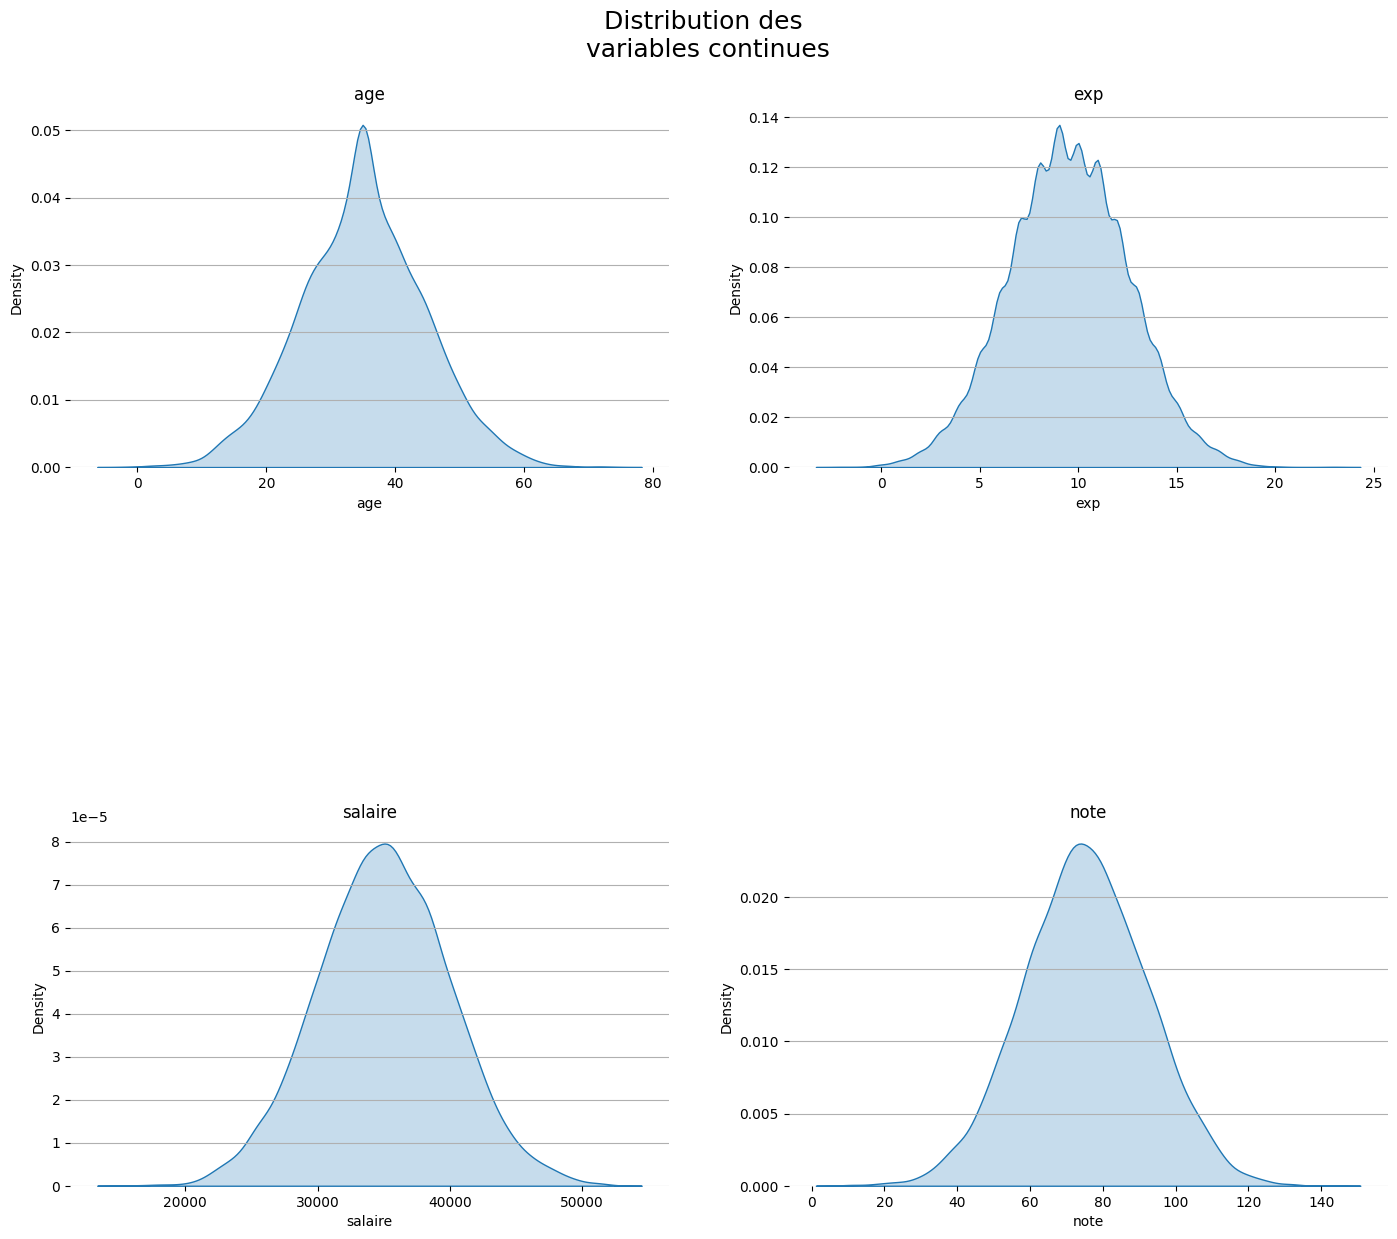

In [281]:
ncols = 2
nrows = len(col_numericals) // ncols + (len(col_numericals) % ncols > 0)
 
plt.figure(figsize=(17, 14))
plt.subplots_adjust(hspace=1)
plt.suptitle("Distribution des \nvariables continues", fontsize=18, y=0.95)
 
for n, variable in enumerate(col_numericals):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
 
    sns.kdeplot(ax=ax, data=df1[variable], legend=None, shade=True)
    ax.grid(visible=True, which='major', axis='y') 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)



#### Analyse

- On constate que les distributions ont plutot une forme normale. 
- Il y a des anomalies : 
    - Les variables age et exp contiennent des valeurs négatives ou inhabituelles (comme age avec des individus de 5ans qui postulent par exemple), ce qui est anormal vu leur nature
    - La variable note est censée avoir comme maximum 100. Ce qui n'est pas le cas ici
- On remarque que la variable expérience a une distribution un peu différente avec des pics entre 8 et 12 ans d'expérience. Surement aussi car cette variable est quatitative discrète.

In [282]:
display(df1[col_numericals].describe(), test[col_numericals].describe())

,age,exp,salaire,note
count,14932.000000,14929.000000,14926.000000,14918.000000
mean,34.983860,9.505593,34982.955447,75.196292
std,9.598354,3.014455,5014.038934,17.077724
min,-2.000000,-2.000000,15541.000000,8.680000
25%,29.000000,7.000000,31599.750000,63.720000
50%,35.000000,9.000000,34979.000000,75.065000
75%,41.000000,12.000000,38366.500000,86.660000
max,74.000000,23.000000,52287.000000,143.220000


,age,exp,salaire,note
count,4977.000000,4975.000000,4979.000000,4968.000000
mean,35.066506,9.484623,34948.528419,75.086093
std,9.642244,3.005309,4970.573539,17.151925
min,-3.000000,0.000000,14128.000000,12.050000
25%,29.000000,7.000000,31583.000000,63.727500
50%,35.000000,9.000000,34982.000000,75.120000
75%,41.000000,11.000000,38337.000000,86.470000
max,69.000000,21.000000,53977.000000,134.140000


Nos remarques sont confirmées par ces statistiques descriptives.

### <span style="color:#EEE8AA">3. Matrice de correlation </span>

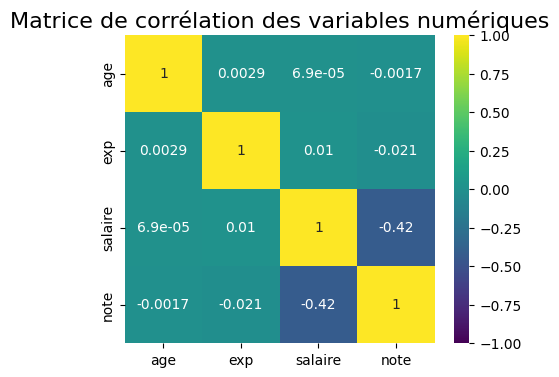

In [283]:
# EXERCICE : 

# Correlation entre les variables numeriques

matrice_corr = df1[col_numericals].corr('spearman') # On définit la matrice de corrélation entre les variables numériques

# Heatmap de la matrice de correlation 

plt.figure(figsize=(5, 4))
sns.heatmap(matrice_corr, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title("Matrice de corrélation des variables numériques", fontsize=16)
plt.show() 

# Que pouvez-vous conclure ? # Voir plus bas

- Il y a forte corrélation négative entre le salaire et la note. Plus la note au test de recherche d'or est élévé et plus le salaire demandé est bas. Autrement dit, les plus "doués" ont des prétentions de salaire plutot modestes.
- Il semble y avoir une corrélation positive mais faible entre l'expérience (exp) et le salaire, ce qui semble logique car généralement, plus une personne a d'expérience, plus son salaire tend à être élevé. 
- La corrélation négative et quasi-nulle entre la note et l'expérience peut être  étrange a priori car on pourrait penser que les années d'expérience n'ont aucun impact sur la note (causalité). Mais on ne doit pas tirer de conclusions hatives directement
- Les autres variables numériques ne montrent pas de corrélations significatives entre elles.

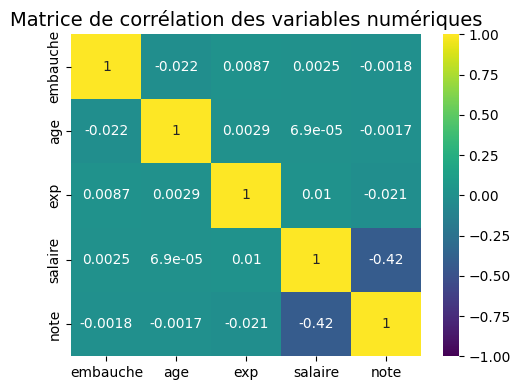

In [284]:
matrice_corr = df1[['embauche'] + col_numericals].corr('spearman')

# Heatmap de la matrice de corrélation
plt.figure(figsize=(5, 4))
sns.heatmap(matrice_corr, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title("Matrice de corrélation des variables numériques", fontsize=14)
plt.tight_layout()
plt.show()

### <span style="color:#EEE8AA">4. Identification des valeurs manquantes </span>

In [285]:
# EXERCICE : Laissez libre court à votre créativité et créez une fonction qui affiche le taux
#            de valeurs manquantes de chaque variable pour chaque type (catégorielle et numérique)
#            par ordre décroissant

for data in [df1, test]:
    taux_missing_values(data) 

--------------------------------------------------
Taux de valeurs manquantes par variable dans le dataset:
--------------------------------------------------
dispo      : 0.57%
note       : 0.55%
sexe       : 0.53%
cheveux    : 0.53%
diplome    : 0.53%
salaire    : 0.49%
specialite : 0.49%
date       : 0.47%
exp        : 0.47%
age        : 0.45%
--------------------------------------------------
Taux de valeurs manquantes par variable dans le dataset:
--------------------------------------------------
note       : 0.64%
diplome    : 0.60%
exp        : 0.50%
cheveux    : 0.46%
age        : 0.46%
salaire    : 0.42%
date       : 0.40%
sexe       : 0.40%
specialite : 0.40%
dispo      : 0.40%


#### Que pouvez-vous conclure ?

On remarque que hormis id et embauche, les autres variables ont des valeurs manquantes à hauteur de 0.5% environ.
C'est donc un très faible taux de valeurs maquantes. On pourra les imputer plus tard


### <span style="color:#EEE8AA">5. Imputation des valeurs manquantes </span>

#### <span style="color:#EEE8AA">5.1 Variables numeriques </span>

##### <span style="color:#EEE8AA">5.1.0 Etape supplémentaire rajoutée - Masques </span>

In [286]:
# # On va borner certaines données numériques avant de les imputer
# # Si l'age est entre du négatif et inférieur à 18ans, on le ramène à 18ans
# df1.loc[(df1['age'] < 18), 'age'] = 18
# test.loc[(test['age'] < 18), 'age'] = 18
# # Si l'expérience est négative, on la ramène à 0
# df1.loc[(df1['exp'] < 0), 'exp'] = 0
# test.loc[(test['exp'] < 0), 'exp'] = 0
# # Si la note est supérieure à100 , on la ramène à 100
# df1.loc[(df1['note'] > 100), 'note'] = 100
# test.loc[(test['note'] > 100), 'note'] = 100

On rajoute des masques sur les valeurs incohérentes des variables numériques

In [287]:
mask_age = df1["age"] < 18 # âge minimum légal de travail 
print(f"{mask_age.sum()} valeurs incohérentes pour l'âge")
df1.loc[mask_age, "age"] = np.nan
test.loc[mask_age, "age"] = np.nan

mask_note = df1["note"] > 100  # note maximale de 100
print(f"{mask_note.sum()} valeurs incohérentes pour la note")
df1.loc[mask_note, "note"] = np.nan
test.loc[mask_note, "note"] = np.nan

mask_exp = df1["exp"] < 0
print(f"{mask_exp.sum()} valeurs incohérentes pour l'expérience")
df1.loc[mask_exp, "exp"] = np.nan
test.loc[mask_exp, "exp"] = np.nan

df1[col_numericals].describe()

541 valeurs incohérentes pour l'âge
1111 valeurs incohérentes pour la note
2 valeurs incohérentes pour l'expérience


,age,exp,salaire,note
count,14391.000000,14927.000000,14926.000000,13807.000000
mean,35.787298,9.507068,34982.955447,72.602169
std,8.794685,3.011958,5014.038934,14.881632
min,18.000000,0.000000,15541.000000,8.680000
25%,29.000000,7.000000,31599.750000,62.625000
50%,35.000000,9.000000,34979.000000,73.510000
75%,42.000000,12.000000,38366.500000,83.820000
max,74.000000,23.000000,52287.000000,99.980000


In [288]:
df1.describe()

,id,age,exp,salaire,note,embauche
count,15000.000000,14391.000000,14927.000000,14926.000000,13807.000000,15000.000000
mean,7499.500000,35.787298,9.507068,34982.955447,72.602169,0.114600
std,4330.271354,8.794685,3.011958,5014.038934,14.881632,0.318549
min,0.000000,18.000000,0.000000,15541.000000,8.680000,0.000000
25%,3749.750000,29.000000,7.000000,31599.750000,62.625000,0.000000
50%,7499.500000,35.000000,9.000000,34979.000000,73.510000,0.000000
75%,11249.250000,42.000000,12.000000,38366.500000,83.820000,0.000000
max,14999.000000,74.000000,23.000000,52287.000000,99.980000,1.000000


In [289]:
test.describe()

,id,age,exp,salaire,note
count,5000.000000,4803.000000,4974.000000,4979.000000,4615.000000
mean,2499.500000,35.046638,9.484117,34948.528419,75.203335
std,1443.520003,9.628886,3.005399,4970.573539,17.219261
min,0.000000,-3.000000,0.000000,14128.000000,12.050000
25%,1249.750000,29.000000,7.000000,31583.000000,63.765000
50%,2499.500000,35.000000,9.000000,34982.000000,75.240000
75%,3749.250000,41.000000,11.000000,38337.000000,86.600000
max,4999.000000,69.000000,21.000000,53977.000000,134.140000


 La distribution a un peu bougé après avoir NaN les valeurs anormales

##### <span style="color:#EEE8AA">5.1.1 Imputation par la moyenne </span>

In [290]:
# EXERCICE : Imputation des variables numériques avec la moyenne
# Les variables imputées sont enregistrées dans de nouvelles colonnes.

for col in col_numericals:  
    df1[f"{col}_imputed_mean"] = df1[col].fillna(df1[col].mean())
    test[f"{col}_imputed_mean"] = test[col].fillna(test[col].mean())
    # On crée une nouvelle colonne pour chaque variable numérique

In [291]:
df1[col_numericals].describe()

,age,exp,salaire,note
count,14391.000000,14927.000000,14926.000000,13807.000000
mean,35.787298,9.507068,34982.955447,72.602169
std,8.794685,3.011958,5014.038934,14.881632
min,18.000000,0.000000,15541.000000,8.680000
25%,29.000000,7.000000,31599.750000,62.625000
50%,35.000000,9.000000,34979.000000,73.510000
75%,42.000000,12.000000,38366.500000,83.820000
max,74.000000,23.000000,52287.000000,99.980000


In [292]:
col_imputed_mean_numericals = ['age_imputed_mean', 'exp_imputed_mean',
                               'salaire_imputed_mean', 'note_imputed_mean']
df1[col_imputed_mean_numericals].describe()

,age_imputed_mean,exp_imputed_mean,salaire_imputed_mean,note_imputed_mean
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,35.787298,9.507068,34982.955447,72.602169
std,8.614291,3.004619,5001.654853,14.277539
min,18.000000,0.000000,15541.000000,8.680000
25%,30.000000,7.000000,31622.500000,63.800000
50%,35.000000,9.000000,34982.955447,72.602169
75%,41.000000,12.000000,38348.000000,82.800000
max,74.000000,23.000000,52287.000000,99.980000


Le écarts sont très très minimes

##### <span style="color:#EEE8AA">5.1.2 Imputation par la regression </span>

In [293]:
#EXERCICE : Imputation par régression
# Laissez libre cours à votre créativité !
# Pour chaque variable numérique contenant des valeurs manquantes, utilisez les variables explicatives appropriées afin d’imputer les valeurs manquantes à l’aide d’une méthode de régression.

# On peut utiliser par exemple la régression linéaire pour imputer les valeurs manquantes 
# Imputation par régression linéaire

for y in col_numericals:
    print(f"\nImputation de la variable '{y}' par régression linéaire...")

    # Variables explicatives = toutes les autres colonnes numériques
    X = [col for col in col_numericals if col != y]

    # Séparation entre les lignes connues et manquantes pour cette variable
    df1_train = df1[df1[y].notna()].dropna(subset=X)
    df1_missing = df1[df1[y].isna()].dropna(subset=X)

    # Entraînement du modèle
    X_train = df1_train[X]
    y_train = df1_train[y]
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Nouvelle colonne (copie de la colonne d'origine)
    new_col = f"{y}_imputed_regression"
    df1[new_col] = df1[y].copy()

    # Si on a des lignes à prédire
    #if not df1_missing.empty:
    X_missing = df1_missing[X]
    y_pred = model.predict(X_missing)      
    # Remplacement des NaN uniquement dans la nouvelle colonne
    df1.loc[X_missing.index, new_col] = y_pred
    print(f"{len(y_pred)} valeurs imputées pour '{y}'.")



Imputation de la variable 'age' par régression linéaire...
555 valeurs imputées pour 'age'.

Imputation de la variable 'exp' par régression linéaire...
66 valeurs imputées pour 'exp'.

Imputation de la variable 'salaire' par régression linéaire...
60 valeurs imputées pour 'salaire'.

Imputation de la variable 'note' par régression linéaire...
1129 valeurs imputées pour 'note'.


In [294]:
# Pour l'ensemble de test:
for y in col_numericals:
    print(f"\nImputation de la variable '{y}' dans l'ensemble test par régression linéaire...")

    # Variables explicatives = toutes les autres colonnes numériques
    X = [col for col in col_numericals if col != y]

    # Séparation entre les lignes connues et manquantes pour cette variable
    test_train = test[test[y].notna()].dropna(subset=X)
    test_missing = test[test[y].isna()].dropna(subset=X)

    # Entraînement du modèle sur les lignes non manquantes
    X_train = test_train[X]
    y_train = test_train[y]

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Création d'une nouvelle colonne imputée
    new_col = f"{y}_imputed_regression"
    test[new_col] = test[y].copy()

    # Si des valeurs sont manquantes, on prédit
    if not test_missing.empty:
        X_missing = test_missing[X]
        y_pred = model.predict(X_missing)

        # Remplacement des NaN uniquement dans la nouvelle colonne
        test.loc[X_missing.index, new_col] = y_pred
        print(f"{len(y_pred)} valeurs imputées pour '{y}'.")
    else:
        print(f"Aucune valeur manquante à imputer pour '{y}'.")


Imputation de la variable 'age' dans l'ensemble test par régression linéaire...
175 valeurs imputées pour 'age'.

Imputation de la variable 'exp' dans l'ensemble test par régression linéaire...
23 valeurs imputées pour 'exp'.

Imputation de la variable 'salaire' dans l'ensemble test par régression linéaire...
17 valeurs imputées pour 'salaire'.

Imputation de la variable 'note' dans l'ensemble test par régression linéaire...
360 valeurs imputées pour 'note'.


In [295]:
col_imputed_regression_numericals = ['age_imputed_regression', 'exp_imputed_regression',
                          'salaire_imputed_regression', 'note_imputed_regression']
display(df1[col_imputed_regression_numericals].describe(),test[col_imputed_regression_numericals].describe())

,age_imputed_regression,exp_imputed_regression,salaire_imputed_regression,note_imputed_regression
count,14946.000000,14993.000000,14986.000000,14936.000000
mean,35.787318,9.507143,34984.307527,72.987466
std,8.629847,3.005325,5005.421776,14.472834
min,18.000000,0.000000,15541.000000,8.680000
25%,30.000000,7.000000,31618.250000,63.620000
50%,35.000000,9.000000,34980.047604,74.220000
75%,41.000000,12.000000,38354.750000,83.490000
max,74.000000,23.000000,52287.000000,99.980000


,age_imputed_regression,exp_imputed_regression,salaire_imputed_regression,note_imputed_regression
count,4978.000000,4997.000000,4996.000000,4975.000000
mean,35.045978,9.484078,34952.011337,75.247922
std,9.458321,2.998480,4964.317009,16.697283
min,-3.000000,0.000000,14128.000000,12.050000
25%,29.000000,7.000000,31592.500000,64.615000
50%,35.000000,9.000000,34990.000000,75.330000
75%,41.000000,11.000000,38327.750000,85.903888
max,69.000000,21.000000,53977.000000,134.140000


###### Remarque :
- On a encore quelques valeurs manquantes après imputation par régression linéaire car
  certaines lignes avaient des variables explicatives manquantes.
- Vu leur très très faible part, on remplace ces valeurs manquantes par la moyenne

In [296]:
for col in col_imputed_regression_numericals:  
    df1[col] = df1[col].fillna(df1[col].mean())
    test[col] = test[col].fillna(test[col].mean())

In [297]:
display(df1[col_imputed_regression_numericals].info(),test[col_imputed_regression_numericals].info())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age_imputed_regression      15000 non-null  float64
 1   exp_imputed_regression      15000 non-null  float64
 2   salaire_imputed_regression  15000 non-null  float64
 3   note_imputed_regression     15000 non-null  float64
dtypes: float64(4)
memory usage: 468.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age_imputed_regression      5000 non-null   float64
 1   exp_imputed_regression      5000 non-null   float64
 2   salaire_imputed_regression  5000 non-null   float64
 3   note_imputed_regression     5000 non-null   float64
dtypes: float64(4)
memory usage: 156.4 KB


None

None

##### <span style="color:#EEE8AA">5.1.3 Comparer la distribution des variables imputées </span>

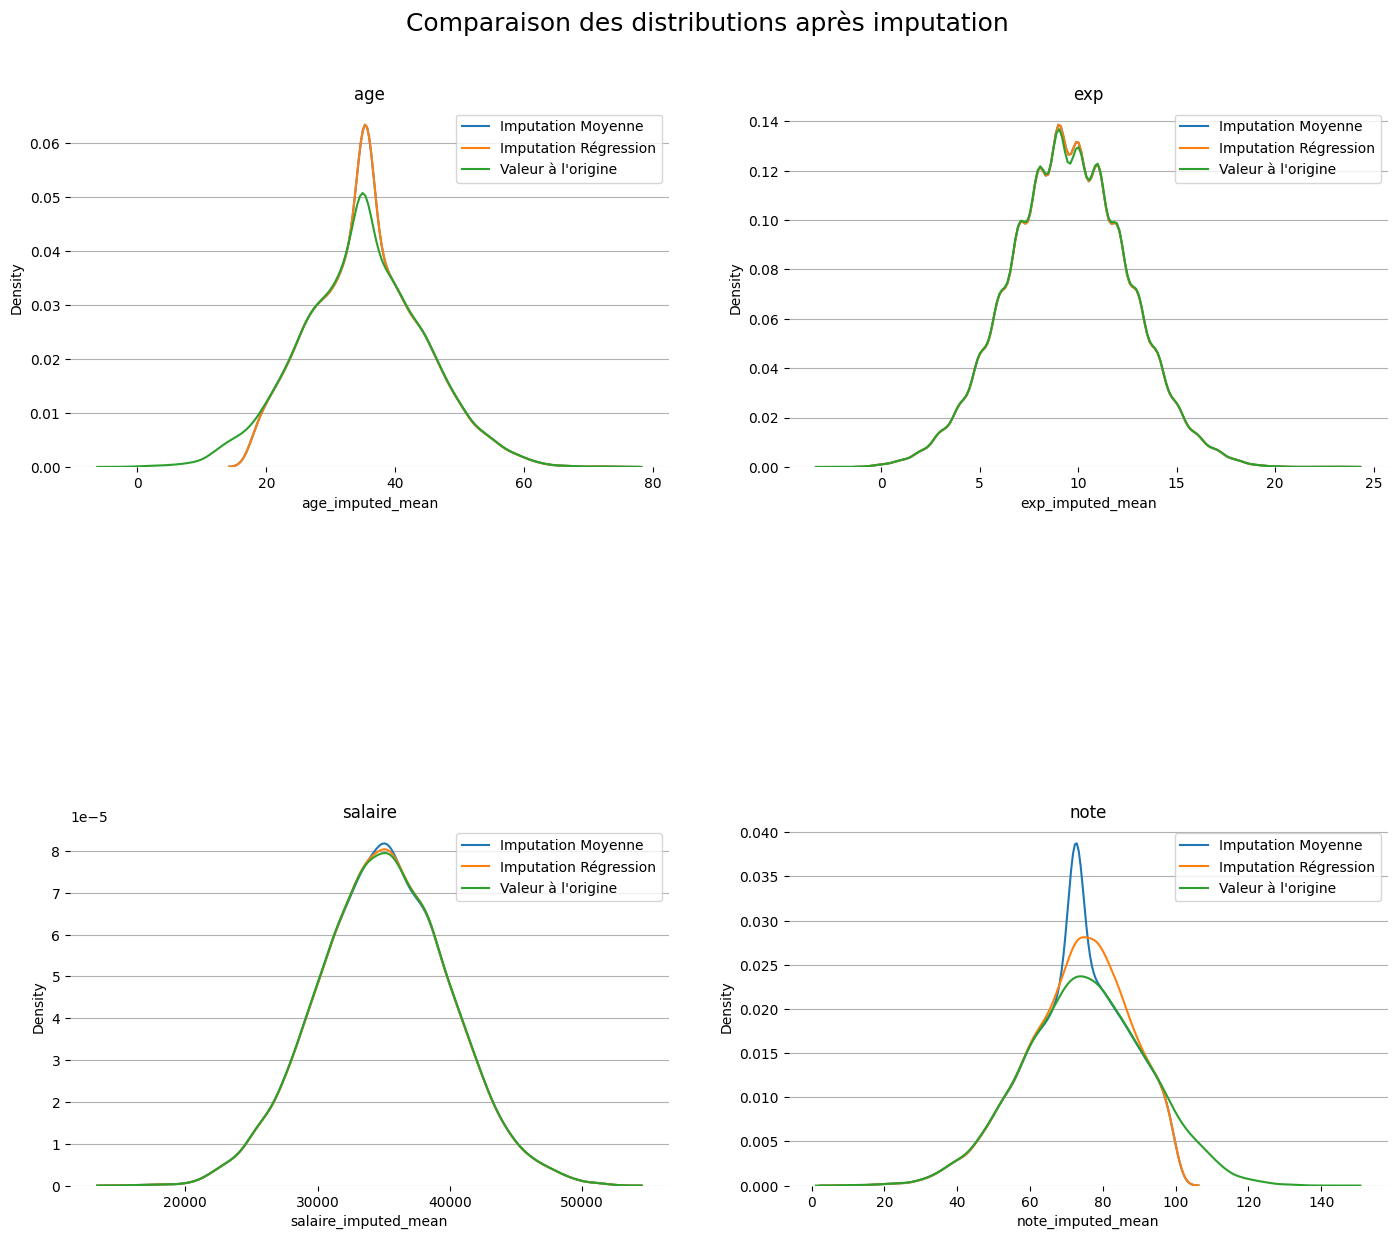

In [298]:
# EXERCICE : Laissez libre court à votre créativité 
# Pour chaque variable numerique
# Comparer la distribution entre l'imputation par la moyenne et l'imputation par Regression


ncols = 2
nrows = len(col_numericals) // ncols + (len(col_numericals) % ncols > 0)
plt.figure(figsize=(17, 14))
plt.subplots_adjust(hspace=1)
plt.suptitle("Comparaison des distributions après imputation", fontsize=18, y=0.95)
for n, variable in enumerate(col_numericals):
    
    ax = plt.subplot(nrows, ncols, n + 1)

    sns.kdeplot(ax=ax, data=df1[f"{variable}_imputed_mean"], label='Imputation Moyenne', shade=False)
    sns.kdeplot(ax=ax, data=df1[f"{variable}_imputed_regression"], label='Imputation Régression', shade=False)
    sns.kdeplot(ax=ax, data=df[f"{variable}"], label="Valeur à l'origine", shade=False)
    
    ax.grid(visible=True, which='major', axis='y') 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)
    ax.legend()
    


###### Que pouvez-vous conclure ?

On remarque que les distributions après imputation par régression et par la moyenne sont très proches les unes des autres. Sauf pour la variable note, où la forne de la distribution change (elle s'arrondie). C'est la variable la plus ompactée par la regression vu son fort taux de valeurs manquantes au départ. Aussi, pour la variable age qui est plus pointue avec la régression

#### <span style="color:#EEE8AA">5.2 Variables categorielles </span>

In [299]:
df1[col_categoricals].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cheveux     14920 non-null  object
 1   sexe        14920 non-null  object
 2   diplome     14920 non-null  object
 3   specialite  14927 non-null  object
 4   dispo       14914 non-null  object
 5   embauche    15000 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 703.3+ KB


In [300]:
col_categorical = ['cheveux', 'sexe', 'diplome',
                   'specialite', 'dispo']
col_categorical_bin = ['sexe', 'dispo']     # variables catégorielles binaires
col_categorical_ord = ['diplome']           # variables catégorielles ordinales
col_categorical_nom = ['specialite', 'cheveux'] # variables catégorielles nominales 

In [301]:
# # Imputation des valeurs manquantes avec la modalité "Missing"
# for col in col_categorical:
#     df1[col] = df1[col].fillna("Missing")

In [302]:
# EXERCICE : Utiliser une methode adequate pour imputer les variables categorielles
# Les variables imputées sont enregistrées dans de nouvelles colonnes.

for col in col_categorical:
    df1[f'{col}_imputed_mode'] = df1[col].fillna(df1[col].mode()[0])
for col in col_categorical:
    test[f'{col}_imputed_mode'] = test[col].fillna(test[col].mode()[0])
    # On crée une nouvelle colonne pour chaque variable catégorielle

### <span style="color:#EEE8AA">6. Detection des outliers </span>

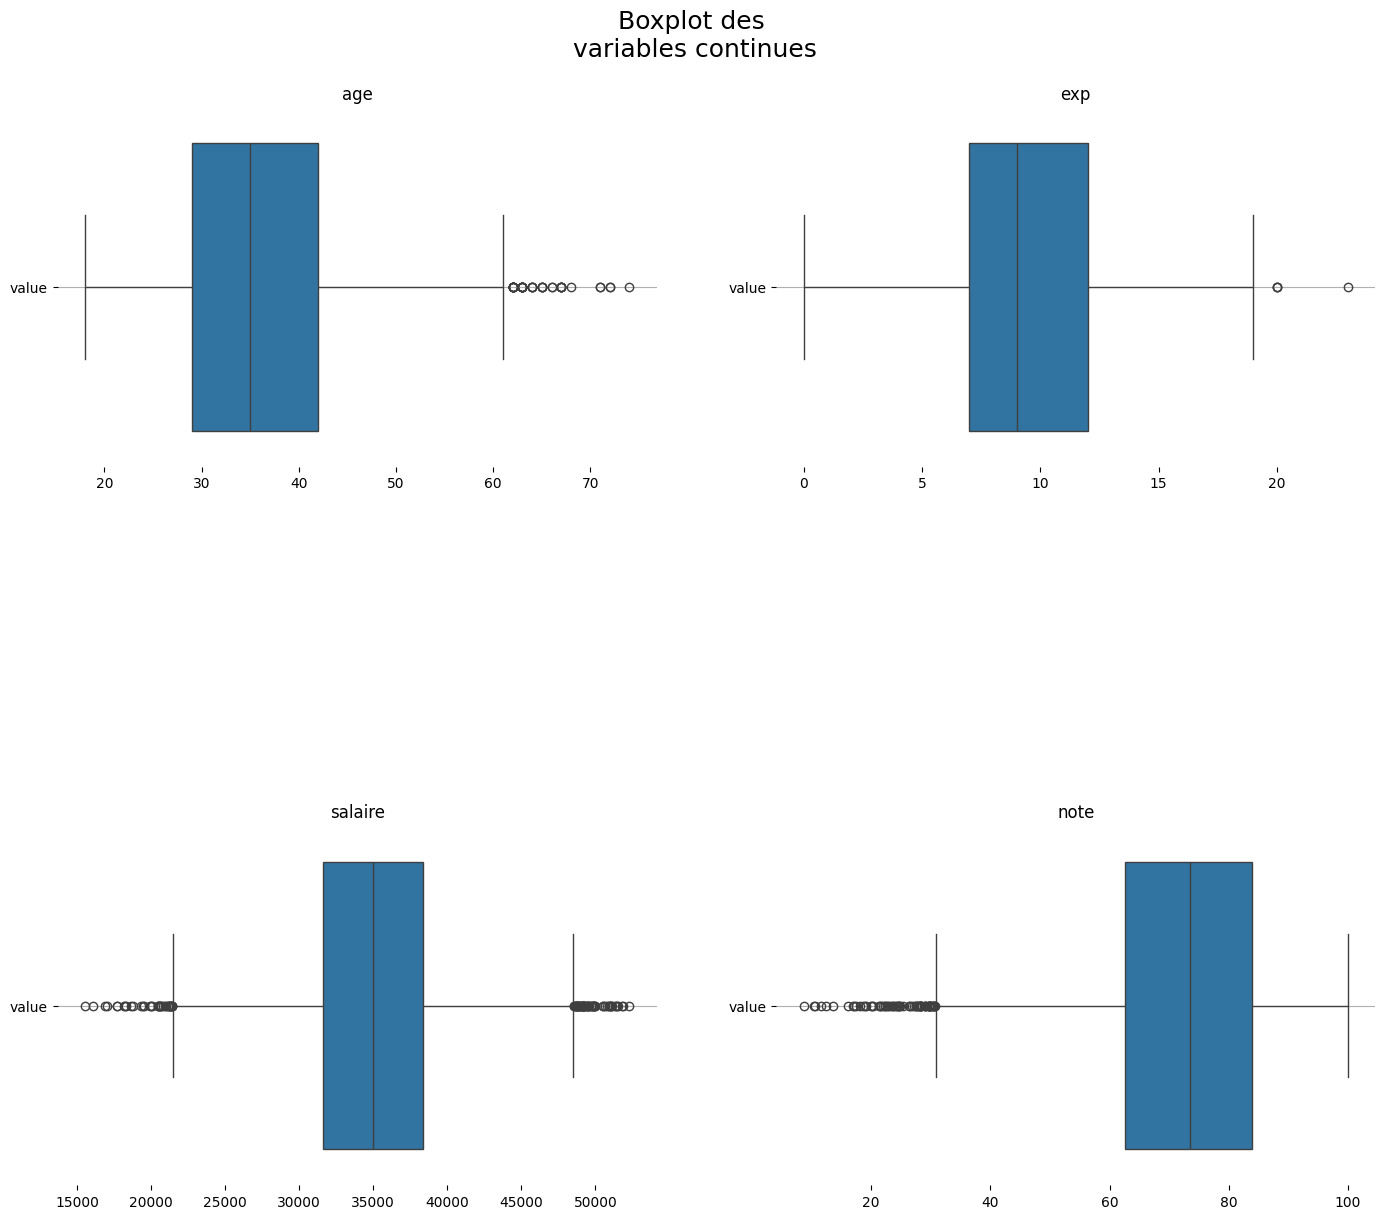

In [303]:
# On affiche les boxplots
temp=pd.melt(df1[col_numericals].reset_index(), id_vars='index', value_vars=col_numericals).iloc[:,-2:] #On change ici avec df1 car c'est le dataframe qui est nettoyé
 
ncols = 2
nrows = len(col_numericals) // ncols + (len(col_numericals) % ncols > 0)
 
plt.figure(figsize=(17, 14))
plt.subplots_adjust(hspace=1)
plt.suptitle("Boxplot des \nvariables continues", fontsize=18, y=0.95)
 
for n, variable in enumerate(col_numericals):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
 
    sns.boxplot(ax=ax, data=temp[temp['variable']==variable], orient='h')
    #sns.kdeplot(ax=ax, data=temp[temp['variable']==variable], legend=None, palette=customPalette, shade=True)
    ax.grid(visible=True, which='major', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)


#### Analyse

- Age : 25% de la population a moins de 28ans, la médiane est à 35 ans, et 75% de la population a moins de 42 ans.  
- Expérience : 25% de la population a moins de 6 ans d'expérience, la médiane est à 8 ans, et 25% de la population a plus de 12 ans d'expérience.  
- Salaire : 25% de la population gagne moins de 32000, la médiane est à 35.000 euros par an, et 75% de la population gagne moins de 60000. On a des outliers avec des valeurs tres elevée a plus de 50k.  
- Note : Une moitié de la population a au moins 70/100 en note et il y a des notes qui dépassent 100, ce qui est étrange.  


In [304]:
# EXERCICE : Appliquer votre fonction aux variables numeriques
for col in col_numericals:
    print(f"Outliers dans la colonne {col} :")
    print(is_outlier(df1, col).value_counts())
    print("\n")


Outliers dans la colonne age :
age
0    14958
1       42
Name: count, dtype: int64


Outliers dans la colonne exp :
exp
0    14996
1        4
Name: count, dtype: int64


Outliers dans la colonne salaire :
salaire
0    14906
1       94
Name: count, dtype: int64


Outliers dans la colonne note :
note
0    14931
1       69
Name: count, dtype: int64




#### Que pouvez-vous conclure ?
- On remarque qu'il y a principalement des outliers dans la colonne age, salaire et note. On peut expliquer cela par le fait que certaines personnes ont des âges très élevés (plus de 60 ans), des salaires très élevés (plus de 100k) et des notes qui dépassent 100.  
- Pour l'experience il n'y a pas beaucoup d'outliers car la majorité des personnes ont entre 0 et 20 ans d'expérience et c'est un travail dans lequel on ne trouve pas de personnes avec des expériences très élevées (chercheur d'or)  

In [305]:
# EXERCICE : Laissez libre court à votre créativité et créez une fonction qui affiche le taux et nombre
#            de valeurs manquantes de chaque variable
#            par ordre décroissant

taux_missing_values_nb(df1)

Taux de valeurs manquantes par variable :
note       : 7.95%
age        : 4.06%
dispo      : 0.57%
cheveux    : 0.53%
diplome    : 0.53%
sexe       : 0.53%
salaire    : 0.49%
exp        : 0.49%
specialite : 0.49%
date       : 0.47%
Nombre de valeurs manquantes par variable :
note          1193
age            609
dispo           86
cheveux         80
diplome         80
sexe            80
salaire         74
exp             73
specialite      73
date            71
dtype: int64


### <span style="color:#EEE8AA">7. Encodage des variables categorielles </span>

In [306]:
col_categorical_imputed_mode = ['cheveux_imputed_mode', 'sexe_imputed_mode', 'diplome_imputed_mode',
                                'specialite_imputed_mode', 'dispo_imputed_mode']
for col in col_categorical_imputed_mode:
    print(df1[col].value_counts())

cheveux_imputed_mode
chatain    4618
brun       4460
blond      4455
roux       1467
Name: count, dtype: int64
sexe_imputed_mode
M    9030
F    5970
Name: count, dtype: int64
diplome_imputed_mode
master      5705
licence     5536
doctorat    1915
bac         1844
Name: count, dtype: int64
specialite_imputed_mode
geologie       7578
forage         3261
detective      3123
archeologie    1038
Name: count, dtype: int64
dispo_imputed_mode
non    8979
oui    6021
Name: count, dtype: int64


On va encoder les variables catégorielles selon qu'elles soient ordinales ou cardinales

In [307]:
# EXERCICE : Utiliser une methode adequate pour encoder les variables categorielles
# Pour les variables catégorielles ordinales, on utilise un Ordinal Encoder simple par mapping
mapping = {'bac': 0, 'licence': 1, 'master': 2, 'doctorat': 3}
df1['diplome_imputed_mode_encoded'] = df1['diplome_imputed_mode'].map(mapping)
test['diplome_imputed_mode_encoded'] = test['diplome_imputed_mode'].map(mapping)

In [308]:
# Pour les variables catégorielles nominales et binaires, on utilise un Mapping binaire simple
df1['sexe_imputed_mode_encoded'] = df1['sexe_imputed_mode'].map({'M': 1, 'F': 0})
df1['dispo_imputed_mode_encoded'] = df1['dispo_imputed_mode'].map({'oui': 1, 'non': 0})
test['sexe_imputed_mode_encoded'] = test['sexe_imputed_mode'].map({'M': 1, 'F': 0})
test['dispo_imputed_mode_encoded'] = test['dispo_imputed_mode'].map({'oui': 1, 'non': 0})

In [309]:
# Pour les variables catégorielles nominales et non-binaires, on utilise le One Hot Encoding (dummies)
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)  
# drop='first' pour éviter la multicolinéarité (on supprime une colonne de référence par variable)
encoded = encoder.fit_transform(df1[['cheveux_imputed_mode', 'specialite_imputed_mode']])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['cheveux_imputed_mode', 'specialite_imputed_mode']))
df1 = pd.concat([df1, encoded_df], axis=1)

In [310]:
encoded = encoder.fit_transform(test[['cheveux_imputed_mode', 'specialite_imputed_mode']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['cheveux_imputed_mode', 'specialite_imputed_mode']))
test = pd.concat([test, encoded_df], axis=1)

### <span style="color:#98FF98">Enregistrement des données</span>

In [311]:
df1.to_csv(r'mo-sef-applied-ml/data/train_validation_prepared.csv', index=False)
test.to_csv(r'mo-sef-applied-ml/data/test_prepared.csv', index=False)

### <span style="color:#EEE8AA">8. Encodage des variables categorielles Embedding </span>

In [255]:
# Exemple variable
VARIABLE = "cheveux"
df1[VARIABLE] = df1[VARIABLE].fillna("Missing")
MODALITE = df1[VARIABLE].unique()
NB_MODALITE = len(MODALITE)
NB_MODALITE,MODALITE

(5, array(['blond', 'chatain', 'brun', 'roux', 'Missing'], dtype=object))

In [256]:
DIM_EMBEDDING = 10

In [257]:
# Exemple d'embedding avec des weights aleatoire non entraine sur une dataset
embedding = nn.Embedding(NB_MODALITE, DIM_EMBEDDING)

In [260]:
print(embedding.weight)

Parameter containing:
tensor([[ 1.3656,  0.7146, -0.7984, -0.6447,  0.2046,  0.4063,  0.0038, -0.9147,
          0.0389,  0.6057],
        [ 0.1689, -1.0110,  0.8995,  0.3179, -0.1837,  0.3751, -0.9827,  1.2450,
          1.0626, -1.5855],
        [-0.0926,  0.4302, -0.6041,  0.5964,  0.1131,  1.2939, -0.3923,  0.0664,
         -0.4393,  1.0080],
        [ 0.1701,  1.3277, -1.7774, -0.6328, -0.6383, -0.7910, -1.0285,  2.4075,
          0.2561,  0.1915],
        [-0.5760,  0.2522, -0.9746, -0.2654,  1.5126,  0.0330,  0.6726, -0.8845,
         -1.2948, -0.0536]], requires_grad=True)


In [261]:
# On encode la variable
df1[VARIABLE+"_label_encoded"] = LabelEncoder().fit_transform(df1[VARIABLE])


In [263]:
# On affiche le resultat
df1[[VARIABLE,VARIABLE+"_label_encoded"]].head()

,cheveux,cheveux_label_encoded
0,blond,1
1,blond,1
2,chatain,3
3,brun,2
4,blond,1


In [ ]:
# On convertit la variable encodée en tenseur torch
variable_to_torch = torch.tensor(df1[VARIABLE+"_label_encoded"].values.tolist())  

In [268]:
print(variable_to_torch)

tensor([1, 1, 3,  ..., 3, 3, 2])


In [269]:
# On applique l'embedding
embeddings = embedding(variable_to_torch)

In [270]:
embeddings

tensor([[ 0.1689, -1.0110,  0.8995,  ...,  1.2450,  1.0626, -1.5855],
        [ 0.1689, -1.0110,  0.8995,  ...,  1.2450,  1.0626, -1.5855],
        [ 0.1701,  1.3277, -1.7774,  ...,  2.4075,  0.2561,  0.1915],
        ...,
        [ 0.1701,  1.3277, -1.7774,  ...,  2.4075,  0.2561,  0.1915],
        [ 0.1701,  1.3277, -1.7774,  ...,  2.4075,  0.2561,  0.1915],
        [-0.0926,  0.4302, -0.6041,  ...,  0.0664, -0.4393,  1.0080]],
       grad_fn=<EmbeddingBackward0>)

In [271]:
# On affiche la shape des embeddings
embeddings.shape

torch.Size([15000, 10])

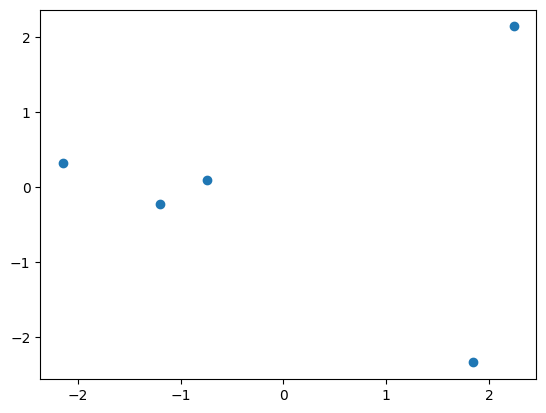

In [272]:
### Visualisation des embeddings
embeddings_weight = embedding.weight.data.numpy()
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings_weight)


plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1])
plt.show()


- On remarque que les modalités sont assez bien séparées dans l'espace 2D.
- On remarque que les points sont assez éloignés les uns des autres, ce qui indique que les embeddings ont réussi à capturer des différences significatives entre les modalités de la variable catégorielle.

### <span style="color:#011C5D">9. Créer votre package python </span>

    - Step 1 : Créer un fichier analyse_exploratoire.py
    - Step 2 : Copier toutes les fonctions de ce notebook dans votre fichier fichier analyse_exploratoire.py
    - Step 3 : Créer un dossier src
    - Step 4 : Deplacer votre fichier analyse_exploratoire.py dans le dossier src
    - Step 5 : Créer un nouveau notebook
    - Step 6 : Dans ce notebook, specifier le chemin vers votre dossier src
    - Step 7 : Executer 'from  analyse_exploratoire import is_outlier, display_missing_values etc...
    - Step 8 : Analyser vos données avec ces nouvelles fonction

## Ressources

Imputation:

- [Imputation Iterrative](https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html) 
- [Imputation](https://scikit-learn.org/stable/modules/impute.html) 

Outliers:

- [Doc sklearn](https://scikit-learn.org/stable/modules/outlier_detection.html)
- [Doc Medium](https://towardsdatascience.com/5-outlier-detection-methods-that-every-data-enthusiast-must-know-f917bf439210)